Download [austin_weather.csv](https://drive.google.com/uc?export=download&id=10JkPB2hhDmkVUoCGFP6gpoRL1mvx0OPf)



In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('austin_weather.csv')
df.head()

,Date,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,...,SeaLevelPressureAvgInches,SeaLevelPressureLowInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches,Events
0,2013-12-21,74,60,45,67,49,43,93,75,57,...,29.68,29.59,10,7,2,20,4,31,0.46,"Rain , Thunderstorm"
1,2013-12-22,56,48,39,43,36,28,93,68,43,...,30.13,29.87,10,10,5,16,6,25,0,
2,2013-12-23,58,45,32,31,27,23,76,52,27,...,30.49,30.41,10,10,10,8,3,12,0,
3,2013-12-24,61,46,31,36,28,21,89,56,22,...,30.45,30.3,10,10,7,12,4,20,0,
4,2013-12-25,58,50,41,44,40,36,86,71,56,...,30.33,30.27,10,10,7,10,2,16,T,


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Date                        1319 non-null   object
 1   TempHighF                   1319 non-null   int64 
 2   TempAvgF                    1319 non-null   int64 
 3   TempLowF                    1319 non-null   int64 
 4   DewPointHighF               1319 non-null   object
 5   DewPointAvgF                1319 non-null   object
 6   DewPointLowF                1319 non-null   object
 7   HumidityHighPercent         1319 non-null   object
 8   HumidityAvgPercent          1319 non-null   object
 9   HumidityLowPercent          1319 non-null   object
 10  SeaLevelPressureHighInches  1319 non-null   object
 11  SeaLevelPressureAvgInches   1319 non-null   object
 12  SeaLevelPressureLowInches   1319 non-null   object
 13  VisibilityHighMiles         1319 non-null   obje

<h2>Soal 1: Visualisasi Scatter Plot Perbandingan Kuantitatif</h2>

Pada tugas kali ini kita akan mengamati nilai DewPointAvg (F) dengan mengamati nilai  HumidityAvg (%), TempAvg (F), dan WindAvg (MPG)

Perhatikan bahwa data kita tidaklah siap untuk di analisis, salah satunya tipe data dari DewPointAvg (F), HumidityAvg (%), dan WindAvg (MPG) adalah object, padahalnya data nya ber isi numeric. maka :
- Ubahlah tipe data tersebut menjadi tipe data float

Kemudian: 

- Kalian tidak akan dengan mudah mengubah tipe data tersebut karena column tersebut mempunyai nilai '-' yang dimana tidak bisa di ubah ke bentuk float, maka replace lah terlebih dahulu data yang bernilai '-' dengan nilai NaN, gunakan method .replace(). baca dokumentasi https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.replace.html
- Isi nilai nan dengan nilai sebelumnya di row tersebut. gunakan method .fillna() dengan argument method bernilai 'ffill', baca dokumentasi https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html
- Sekarang ubah tipe datanya dengan float, gunakan method .astype(), baca dokumentasi https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.astype.html

Setelah ini sebagian data siap untuk di jadikan bahan analisis. maka:

Buahlah visualisasi perbandingan kuantitatif scatter plot, sehingga menghasilkan gambar seperti dibawah:

ket: 

- colormap adalah 'coolwarm'
- berikat warna terhadap setiap data poin dengan nilai dari column TempAvgF
- berikan size terhadap setiap data poin dengan nilai dari column WindAvgMPH, kalikan dengan 20 agar size terlihat lebih besar


Berikan pendapat dari insight yang bisa di dapat dari visualisasi perbandingan kuantitatif ini!!!

![alt text](https://drive.google.com/uc?id=1Pp5oIc-39mcw2vrw6xgCRM9GsvyRtPI5)

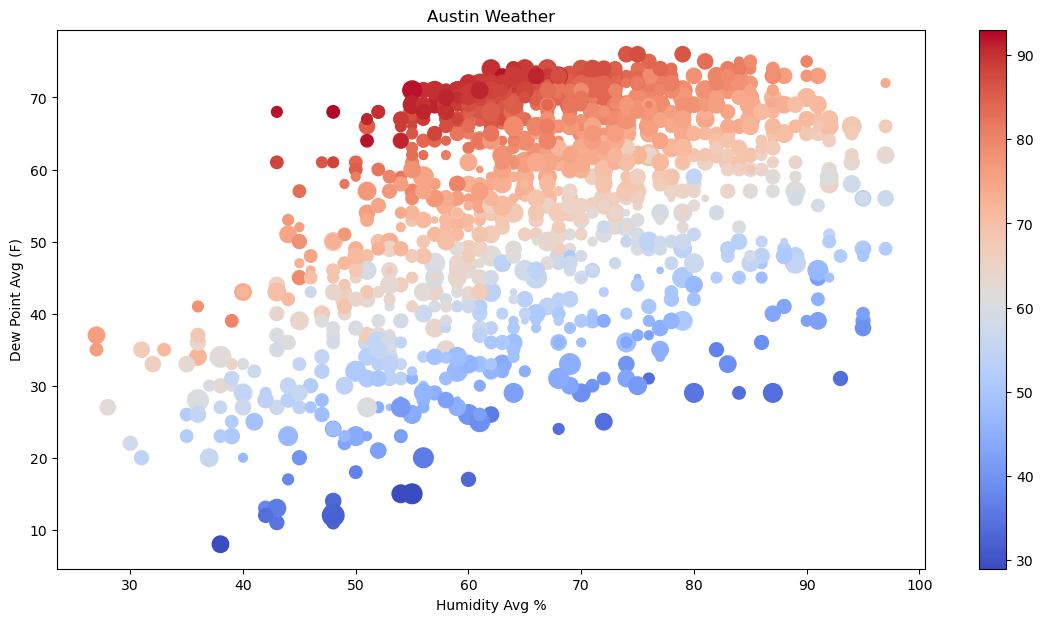

In [35]:
# code here
plt.style.use('default')
cols = ["DewPointAvgF","HumidityAvgPercent","TempAvgF","WindAvgMPH"]
cols2 = ["DewPointAvgF","HumidityAvgPercent","WindAvgMPH"]
df[cols] = df[cols].replace('-', np.nan)
df[cols] = df[cols].fillna(method='ffill')
df[cols2] = df[cols2].astype(float)

fig, ax = plt.subplots(figsize=(14,7))
warna = df['TempAvgF']
ukuran = df['WindAvgMPH']*20
humiditas = df['HumidityAvgPercent']
dew = df['DewPointAvgF']

axmap = ax.scatter(humiditas,dew, cmap='coolwarm', c=warna, s=ukuran)
ax.set_xlabel('Humidity Avg %')
ax.set_ylabel('Dew Point Avg (F)')
ax.set_title('Austin Weather')
fig.colorbar(axmap)
plt.show()

Insight :
- Rata-rata dew point tertinggi (60F-80F) berada pada angka humiditas 50-70% 
- Humidity paling rendah yaitu berada pada 38% dan berada pada Dew Point 0-10F 
- Dew point dan Humidity berbanding lurus yang menghasilkan grafik yang meniingkat. Semakin tinggi Dew Point semakin tinggi juga Humidity Avg %
- Rentang Dew Point Avg adalah 10-70 Fahrenheit
- Rentang Humidity Avg adalah 30-100%
- Humidity maksimum tidak ada yang menyentuh 100%


---

---

Downoad  <a href="https://blog.sanbercode.com/wp-content/uploads/2020/05/vgsales.csv">vgsales.csv</a>

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('vgsales.csv')
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


<h2>Soal 2: Preparing Data</h2>

Manipulasi data tersebut dengan menggroupkan berdasarkan Genre, kemudian ambil rata2 penjualan untuk setiap Region Kecuali Global_Sales berdasarkan kategori Genre.

In [38]:
#code here
game_sale = df.groupby('Genre')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].mean()
display(game_sale)

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Genre,,,,
Action,0.264726,0.158323,0.048236,0.056508
Adventure,0.082271,0.049868,0.040490,0.013072
Fighting,0.263667,0.119481,0.103007,0.043255
Misc,0.235906,0.124198,0.061967,0.043312
Platform,0.504571,0.227573,0.147596,0.058228
Puzzle,0.212680,0.087251,0.098471,0.021564
Racing,0.287766,0.190865,0.045388,0.061865
Role-Playing,0.219946,0.126384,0.236767,0.040060
Shooter,0.444733,0.239137,0.029221,0.078389


Expected Output:

![alt text](https://drive.google.com/uc?id=1dR4vthSt22gM_LdfSBZCMIKPL6xd7nVl)

---

<h2>Soal 3: Perbandingan Kuantitatif Barplot - Grouping Visualisasi Dengan Barplot</h2>

1. Visualisasikan gambar yang tadi kita manipulasi, untuk menghasilkan visualisasi seperti di bawah ini
2. Tuliskan apa insight yang bisa kamu dapat dari visualisasi tersebut

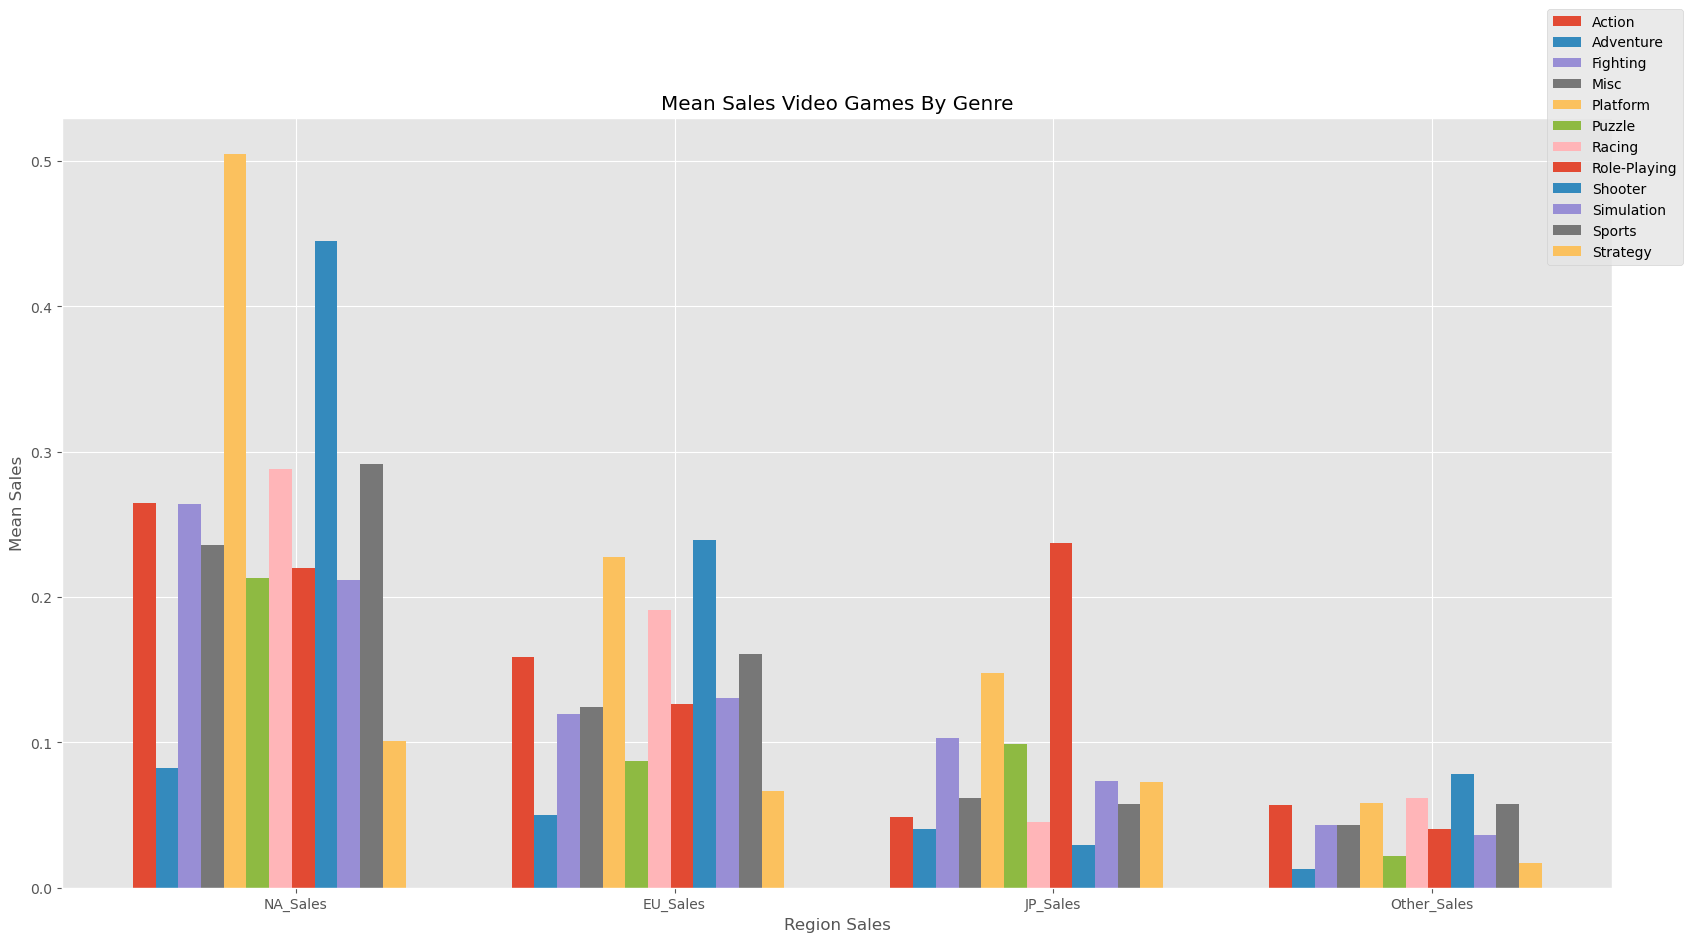

In [112]:
#code here
import numpy as np
import pandas as pd

plt.style.use('ggplot')
baru = game_sale.T
x = np.arange(0,5*len(baru.index), 5)
y = baru['Action']
y2 = baru['Adventure']
y3 = baru['Fighting']
y4 = baru['Misc']
y5 = baru['Platform']
y6 = baru['Puzzle']
y7 = baru['Racing']
y8 = baru['Role-Playing']
y9 = baru['Shooter']
y10 = baru['Simulation']
y11 = baru['Sports']
y12 = baru['Strategy']

fig, ax = plt.subplots(figsize=(20, 10))

ax.bar(x, y, width=0.3, label='Action')
ax.bar(x+0.3, y2, width=0.3, label='Adventure')
ax.bar(x+0.6, y3, width=0.3, label='Fighting')
ax.bar(x+0.9, y4, width=0.3, label='Misc')
ax.bar(x+1.2, y5, width=0.3, label='Platform')
ax.bar(x+1.5, y6, width=0.3, label='Puzzle')
ax.bar(x+1.8, y7, width=0.3, label='Racing')
ax.bar(x+2.1, y8, width=0.3, label='Role-Playing')
ax.bar(x+2.4, y9, width=0.3, label='Shooter')
ax.bar(x+2.7, y10, width=0.3, label='Simulation')
ax.bar(x+3.0, y11, width=0.3, label='Sports')
ax.bar(x+3.3, y12, width=0.3, label='Strategy')
ax.set_xticks([ 2,  7, 12, 17])
ax.set_xticklabels(list(baru.index))
ax.set_xlabel('Region Sales')
ax.set_ylabel('Mean Sales')
ax.set_title('Mean Sales Video Games By Genre')
plt.legend(bbox_to_anchor=(1.05,1.15))
plt.show()


Jawab:
My Insight :
- Rata rata penjualan game tertinggi berada pada NA_Sales pada genre game Strategy dan diikuti genre Adventure pada Region yang sama
- Urutan rata-rata penjualan game dari tertinggi sampai terendah yang diurutkan berdasarkan Region Sales adalah sebagai berikut: NA_Sales, EU_Sales, JP_Sales, Other_Sales
- Penjualan genre paling tinggi pada setiap Region sebagai berikut:
    1. NA_Sales : Platform
    2. EU_Sales : Shooter
    3. JP_Sales : Role-Playing
    4. Other_Sales : Shooter
- Penjualan genre paling rendah pada setiap Region sebagai berikut:
    1. NA_Sales : Adventure
    2. EU_Sales : Adventure
    3. JP_Sales : Shooter
    4. Other_Sales : Adventure
- Genre Adventure adalah genre yang paling tidak diminati untuk setiap Region
- Penjualan Genre Action selalu lebih tinggi dibanding genre Role-Playing kecuali pada region JP_Sales
- Rata-rata panjualan NA_Sales medominasi paling tinggi dibanding region lainnya
- Genre Platform selalu masuk top 3 penjualan paling tinggi pada setiap Region
- Genre Adventure selalu lebih rendah satu tingkat dibandingkan genre Strategy pada setiap regionnya

Expected Output:

![alt text](https://drive.google.com/uc?id=1A2s9Uy2i471VEYIZqMoVUIlZnVOUc8ha)

---

<h2>Soal 4: Perbandingan Kuantitatif Barplot - Stack Barplot</h2>

1. Visualisasikan gambar yang tadi kita manipulasi, untuk menhasilkan visualisasi seperti di bawah ini
2. Tuliskan apa insight yang bisa kamu dapat dari visualisasi tersebut

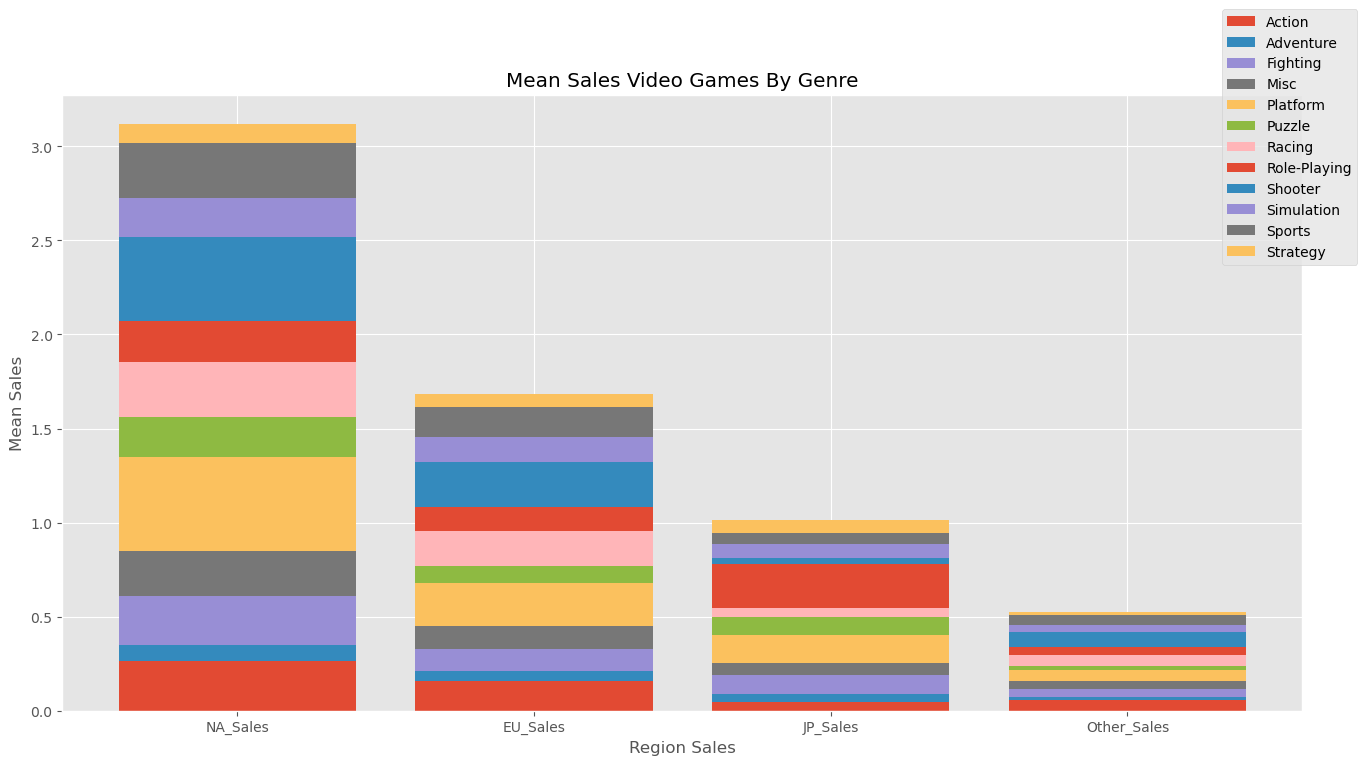

In [67]:
#code here

x = baru.index
y = baru['Action']
y2 = baru['Adventure']
y3 = baru['Fighting']
y4 = baru['Misc']
y5 = baru['Platform']
y6 = baru['Puzzle']
y7 = baru['Racing']
y8 = baru['Role-Playing']
y9 = baru['Shooter']
y10 = baru['Simulation']
y11 = baru['Sports']
y12 = baru['Strategy']

fig, ax = plt.subplots(figsize=(16, 8))
ax.bar(x, y, label='Action')
ax.bar(x, y2, bottom=y, label='Adventure')
ax.bar(x, y3, bottom=y+y2, label='Fighting')
ax.bar(x, y4, bottom=y+y2+y3, label='Misc')
ax.bar(x, y5, bottom=y+y2+y3+y4, label='Platform')
ax.bar(x, y6, bottom=y+y2+y3+y4+y5, label='Puzzle')
ax.bar(x, y7, bottom=y+y2+y3+y4+y5+y6, label='Racing')
ax.bar(x, y8, bottom=y+y2+y3+y4+y5+y6+y7, label='Role-Playing')
ax.bar(x, y9, bottom=y+y2+y3+y4+y5+y6+y7+y8, label='Shooter')
ax.bar(x, y10, bottom=y+y2+y3+y4+y5+y6+y7+y8+y9, label='Simulation')
ax.bar(x, y11, bottom=y+y2+y3+y4+y5+y6+y7+y8+y9+y10, label='Sports')
ax.bar(x, y12, bottom=y+y2+y3+y4+y5+y6+y7+y8+y9+y10+y11, label='Strategy')
plt.legend(bbox_to_anchor=(1.05,1.15))
ax.set_xlabel('Region Sales')
ax.set_ylabel('Mean Sales')
ax.set_title('Mean Sales Video Games By Genre')

plt.show()

Jawab:
My Insight :
- Rata rata penjualan game tertinggi berada pada NA_Sales pada genre game Strategy dan diikuti genre Adventure pada Region yang sama
- Urutan rata-rata penjualan game dari tertinggi sampai terendah yang diurutkan berdasarkan Region Sales adalah sebagai berikut: NA_Sales, EU_Sales, JP_Sales, Other_Sales
- Penjualan genre paling tinggi pada setiap Region sebagai berikut:
    1. NA_Sales : Platform
    2. EU_Sales : Shooter
    3. JP_Sales : Role-Playing
    4. Other_Sales : Shooter
- Penjualan genre paling rendah pada setiap Region sebagai berikut:
    1. NA_Sales : Adventure
    2. EU_Sales : Adventure
    3. JP_Sales : Shooter
    4. Other_Sales : Adventure
- Genre Adventure adalah genre yang paling tidak diminati untuk setiap Region
- Penjualan Genre Action selalu lebih tinggi dibanding genre Role-Playing kecuali pada region JP_Sales
- Rata-rata panjualan NA_Sales medominasi paling tinggi dibanding region lainnya
- Genre Platform selalu masuk top 3 penjualan paling tinggi pada setiap Region
- Genre Adventure selalu lebih rendah satu tingkat dibandingkan genre Strategy pada setiap regionnya


Expected Output:

![alt text](https://drive.google.com/uc?id=1_yis-3aZsEbsk68tpoPHoNlFftaz2GrO)